In [29]:
# Reading txt file contents from all files in a specific folder
import glob

# List containing tuples of (file_name, contents)
data_from_files =[]

folder_path ="/Users/apple/Documents/Zoom/2020-08-15 08.12.26 Sense Sunyabhisithkul's Personal Meeting Room 7195587091/"
txt_files = glob.glob(folder_path + "*.txt")

for file_name in txt_files:
    with open(file_name, 'rt') as fd:
        data = fd.readlines()
        data_from_files.append((file_name,data))

In [30]:
example = data_from_files[0]

In [31]:
# Dictionary to story texts per person and total words per person
texts_person = {}
words_per_person = {}

# Tuple unpacking for file_name, contents
file_name, contents = example
print(f"File Name: {file_name}\n")
for line in contents:
    line_no_time = line.split('\t')[1]
    person, text = line_no_time.split(':',1)
    person = " ".join(person.split()[1:])
    if person in texts_person:
        texts_person[person].append(line)
        words_per_person[person] += len(text)
    else:
        texts_person[person] = [line]
        words_per_person[person] = len(text.split())
    """print(f"Person: {person}")
    print(f"Text Length = {len(text)}")
    print(f"Text: {text}")"""

File Name: /Users/apple/Documents/Zoom/2020-08-15 08.12.26 Sense Sunyabhisithkul's Personal Meeting Room 7195587091/meeting_saved_chat.txt



In [32]:
texts_person

{'Sense Sunyabhisithkul': ['08:11:50\t From Sense Sunyabhisithkul : Is your speaker off\n',
  '08:12:03\t From Sense Sunyabhisithkul : My mic is working now\n',
  '08:13:12\t From Sense Sunyabhisithkul : Hello this is Sense\n',
  '08:13:34\t From Sense Sunyabhisithkul : I am going to get a better engagement report score than you\n',
  '08:13:36\t From Sense Sunyabhisithkul : Woah\n',
  '08:13:43\t From Sense Sunyabhisithkul : So old Ronit\n',
  '08:13:49\t From Sense Sunyabhisithkul : Nice to meet you too!\n',
  '08:15:04\t From Sense Sunyabhisithkul : It’s okay baby!!\n',
  '08:15:07\t From Sense Sunyabhisithkul : You got thisss\n',
  '08:15:45\t From Sense Sunyabhisithkul : Hiiii\n',
  '08:15:48\t From Sense Sunyabhisithkul : More chat pleaseee\n',
  '08:16:25\t From Sense Sunyabhisithkul : Hellooo\n',
  '08:16:30\t From Sense Sunyabhisithkul : I am dominating the chat hehe\n',
  '08:16:36\t From Sense Sunyabhisithkul : Look at me\n',
  '08:16:52\t From Sense Sunyabhisithkul : I’m a 

In [33]:
words_per_person

{'Sense Sunyabhisithkul': 365, 'Ronit Bhatia': 553}

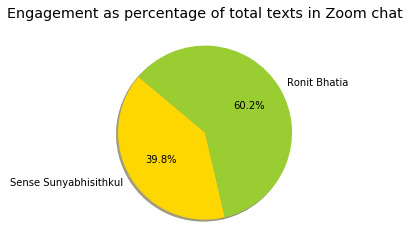

In [34]:
import matplotlib.pyplot as plt

# Plotting a pie chart in term of engagement by text
plt.axis("equal")
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie([float(v) for v in words_per_person.values()], labels=[k for k in words_per_person.keys()],autopct='%1.1f%%', colors=colors, shadow=True,  startangle=140)
plt.title('Engagement as percentage of total texts in Zoom chat')
plt.savefig('piechart.png', dpi=300, bbox_inches = 'tight')
plt.show()

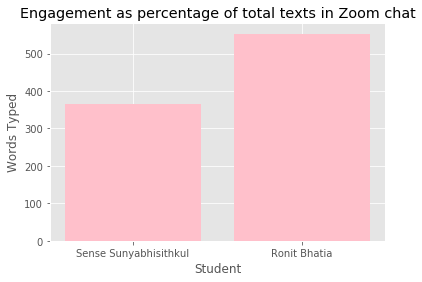

In [37]:
# Plotting a bar chart in term of engagement by text
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.bar(height=[float(v) for v in words_per_person.values()], x=[k for k in words_per_person.keys()], color="pink")
plt.xlabel("Student")
plt.ylabel("Words Typed")
plt.title('Engagement as percentage of total texts in Zoom chat')
plt.show()

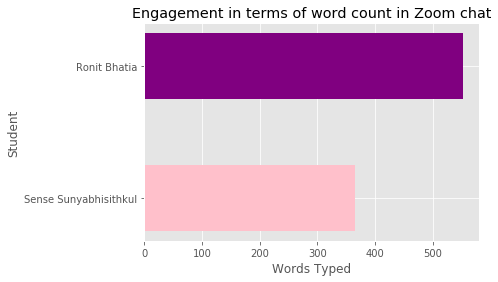

In [36]:
plt.style.use('ggplot')
plt.barh(width=[float(v) for v in words_per_person.values()], y=[k for k in words_per_person.keys()], color=["pink","purple","#eebdff"], height =0.5)
plt.ylabel("Student")
plt.xlabel("Words Typed")
plt.title('Engagement in terms of word count in Zoom chat')
plt.savefig('barchart.png', dpi=300, bbox_inches = 'tight')
plt.show()

In [25]:
# Find max length of lines of text per person (to avoid error during csv conversion)
texts_list = list(texts_person.values())
max_length = 0
for person in texts_list:
    max_length = max(max_length,len(person))
    
print(f"Maximum length of lines typed per person in the chat is: {max_length} lines")

Maximum length of lines typed per person in the chat is: 66 lines


In [27]:
# Producing table as a summary report
import pandas as pd

output = pd.DataFrame()
for name in words_per_person.keys():
    print(name)
    contents = []
    word_num = words_per_person[name]
    if word_num == 1:
        contents.append(str(words_per_person[name])+" word typed") 
    else:
        contents.append(str(words_per_person[name])+" words typed") 
    for line in texts_person[name]:
        contents.append(line)
        
    # Add empty lines to shorter columns
    empty_lines = max_length - len(texts_person[name])
    for line in range(empty_lines):
        contents.append("")
        
    output[name] = contents

# Output as CSV file
#output.to_csv("chatEngagementSummary.csv", index=False)

Sense Sunyabhisithkul
Ronit Bhatia


In [28]:
output

,Sense Sunyabhisithkul,Ronit Bhatia
0,365 words typed,553 words typed
1,08:11:50\t From Sense Sunyabhisithkul : Is you...,08:13:15\t From Ronit Bhatia : job joob\n
2,08:12:03\t From Sense Sunyabhisithkul : My mic...,08:13:24\t From Ronit Bhatia : Hi\n
3,08:13:12\t From Sense Sunyabhisithkul : Hello ...,08:13:30\t From Ronit Bhatia : my name is Ronit\n
4,08:13:34\t From Sense Sunyabhisithkul : I am g...,08:13:32\t From Ronit Bhatia : I am 20 years o...
5,08:13:36\t From Sense Sunyabhisithkul : Woah\n,08:13:38\t From Ronit Bhatia : Nice to meet yo...
6,08:13:43\t From Sense Sunyabhisithkul : So old...,08:13:57\t From Ronit Bhatia : snoogums!\n
7,08:13:49\t From Sense Sunyabhisithkul : Nice t...,08:14:43\t From Ronit Bhatia : bb\n
8,08:15:04\t From Sense Sunyabhisithkul : It’s o...,08:15:51\t From Ronit Bhatia : hiiiii\n
9,08:15:07\t From Sense Sunyabhisithkul : You go...,08:15:54\t From Ronit Bhatia : of course\n
